<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Right_Smaller_Than_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Right Smaller Than

Write a function that takes in an array of integers and returns an array of the same length, where each element in the output array corresponds to the number of integers in the input array that are to the right of the relevant index and that are strictly smaller than the integer at that index.

In other words, the value at `output[i]` represents the number of integers that are to the right of `i` and that are strictly smaller than `input[i]`.

Sample Input

```
array = [8, 5, 11, -1, 3, 4, 2]
```



Sample Output

```
[5, 4, 4, 0, 1, 1, 0]
// There are 5 integers smaller than 8 to the right of it.
// There are 4 integers smaller than 5 to the right of it.
// There are 4 integers smaller than 11 to the right of it.
// Etc..
```



## Solution (Brute Force)

In [1]:
# Time O(n^2)
# Space O(n)
def rightSmallerThan(array):
	results = [0] * len(array)
	for i in range(len(array) - 1):
		count = 0
		for j in range(i + 1, len(array)):
			if array[i] > array[j]:
				count += 1
			
		results[i] = count

	return results

In [2]:
array = [8, 5, 11, -1, 3, 4, 2]

In [3]:
print(rightSmallerThan(array))

[5, 4, 4, 0, 1, 1, 0]


## Solution (BST)

In [4]:
# Time O(nlog(n))
# Space O(n)

def rightSmallerThan(array):
	if len(array) == 0:
		return []
	
	right_smaller_count = array[:]
	last_idx = len(array) - 1
	bst = special_bst(array[last_idx])
	right_smaller_count[last_idx] = 0
	for i in reversed(range(len(array) - 1)):
		bst.insert(array[i], i, right_smaller_count)

	return right_smaller_count

class special_bst():
	def __init__(self, value):
		self.value = value
		self.left = None
		self.right = None
		self.left_node_count = 0

	def insert(self, value, idx, right_smaller_count, smaller_count_at_insertion = 0):
		if value < self.value:
			self.left_node_count += 1
			if self.left == None:
				self.left = special_bst(value)
				right_smaller_count[idx] = smaller_count_at_insertion
			else:	
				self.left.insert(value, idx, right_smaller_count, smaller_count_at_insertion)

		else:
			smaller_count_at_insertion += self.left_node_count
			if value > self.value:
				smaller_count_at_insertion += 1
			if self.right == None:
				self.right = special_bst(value)
				right_smaller_count[idx] = smaller_count_at_insertion
			else:
				self.right.insert(value, idx, right_smaller_count, smaller_count_at_insertion)

In [5]:
array = [8, 5, 11, -1, 3, 4, 2]

In [6]:
print(rightSmallerThan(array))

[5, 4, 4, 0, 1, 1, 0]


In [7]:
# ---------- Test Case 1 ----------
array = [8, 5, 11, -1, 3, 4, 2]
print(rightSmallerThan(array))

# ---------- Test Case 2 ----------
array = []
print(rightSmallerThan(array))

# ---------- Test Case 3 ----------
array = [1]
print(rightSmallerThan(array))

# ---------- Test Case 4 ----------
array = [0, 1, 1, 2, 3, 5, 8, 13]
print(rightSmallerThan(array))

# ---------- Test Case 5 ----------
array = [13, 8, 5, 3, 2, 1, 1, 0]
print(rightSmallerThan(array))

# ---------- Test Case 6 ----------
array = [8, 5, 2, 9, 5, 6, 3]
print(rightSmallerThan(array))

[5, 4, 4, 0, 1, 1, 0]
[]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[7, 6, 5, 4, 3, 1, 1, 0]
[5, 2, 0, 3, 1, 1, 0]


## Conceptual Note

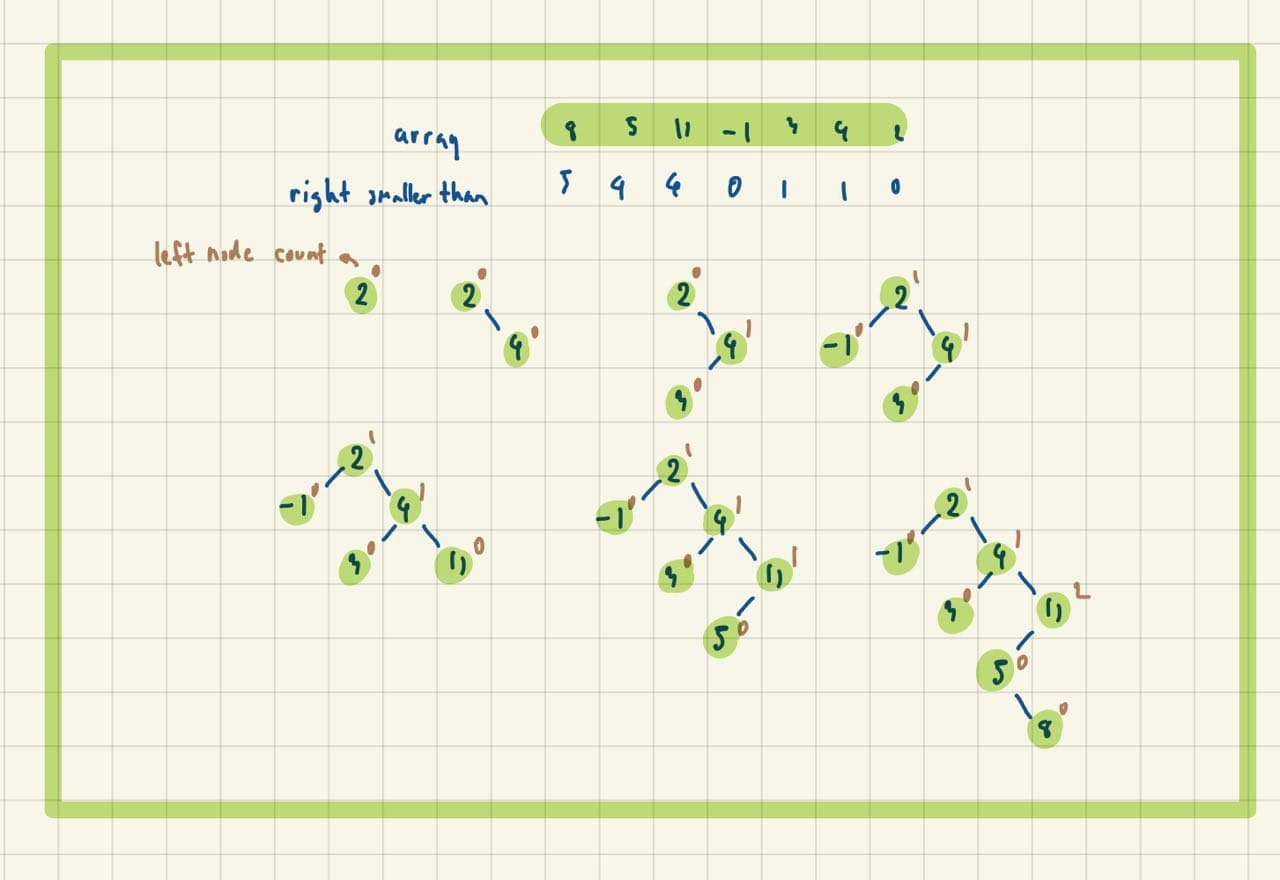